In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
es추가
텐서보드 추가
리콜 추가

In [ ]:
# # 결막염(무)
# !gdown 16yW3MR3-6Dq-CVcJcLuUNwoEpnfnKLIC

Downloading...
From: https://drive.google.com/uc?id=16yW3MR3-6Dq-CVcJcLuUNwoEpnfnKLIC
To: /content/결막염_images_무224.pickle
100% 1.45G/1.45G [00:07<00:00, 199MB/s]


In [ ]:
# 결막염(유)
!gdown 1pKMO25KAV6XVWAIy1XilIj0wK8k2Ddr8

Downloading...
From: https://drive.google.com/uc?id=1pKMO25KAV6XVWAIy1XilIj0wK8k2Ddr8
To: /content/결막염_images_유224.pickle
100% 1.44G/1.44G [00:11<00:00, 126MB/s]


# Load data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
import pandas as pd

# 데이터 로드
img_u1 = pd.read_pickle('/content/drive/MyDrive/결막염_images_유224.pickle')
img_m1 = pd.read_pickle('/content/drive/MyDrive/결막염_images_무224.pickle')


print(img_u1.shape) 
print(img_m1.shape)

(9598, 224, 224, 3)
(9600, 224, 224, 3)


In [ ]:
import numpy as np

gm_imgs = np.concatenate((img_u1,img_m1))
print(gm_imgs.shape)

(19198, 224, 224, 3)


In [ ]:
gm_label = np.concatenate((np.full(9598, 1),np.full(9600, 0)))
gm_label.shape

(19198,)

In [ ]:
from sklearn.model_selection import train_test_split

# train_test_split
gm_train_images, gm_test_images, gm_train_labels, gm_test_labels = train_test_split(gm_imgs, gm_label,stratify = gm_label , test_size=0.3)
gm_val_images, gm_test_images, gm_val_labels, gm_test_labels = train_test_split(gm_test_images, gm_test_labels, stratify = gm_test_labels, test_size = 0.4)

print(gm_train_images.shape, gm_val_images.shape, gm_test_images.shape)
print(gm_train_labels.shape, gm_val_labels.shape, gm_test_labels.shape)

(13438, 224, 224, 3) (3456, 224, 224, 3) (2304, 224, 224, 3)
(13438,) (3456,) (2304,)


# 결막염


In [ ]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt

In [ ]:
gm_train_images.shape, gm_train_labels.shape, gm_test_images.shape, gm_test_labels.shape

((13438, 224, 224, 3), (13438,), (2304, 224, 224, 3), (2304,))

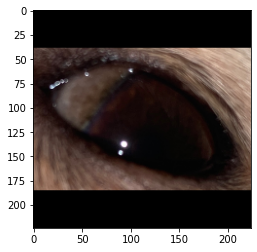

In [ ]:
import cv2
plt.imshow(cv2.cvtColor(gm_train_images[3], cv2.COLOR_BGR2RGB))

### ResNet50

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50


## 일부 재학습 모델
base_model_50 = ResNet50(include_top=False, input_shape = (224,224 ,3), weights = 'imagenet')

base_model_50.trainable = True	

for layer in base_model_50.layers[:-10]:
    layer.trainable = False		

inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model_50(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model_50.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
s_model_res50 = tf.keras.Model(inputs, outputs)


In [ ]:
s_model_res50.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics=['accuracy'])

# 모델 fitting
history = s_model_res50.fit(gm_train_images, gm_train_labels, epochs = 5, validation_data=(gm_val_images, gm_val_labels),  batch_size= 256)

Epoch 1/5
53/53 [==============================] - 67s 1s/step - loss: 1.1763 - accuracy: 0.9332 - val_loss: 0.0272 - val_accuracy: 0.9916
Epoch 2/5
53/53 [==============================] - 50s 953ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0070 - val_accuracy: 0.9965
Epoch 3/5
53/53 [==============================] - 50s 955ms/step - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.0076 - val_accuracy: 0.9977
Epoch 4/5
53/53 [==============================] - 50s 952ms/step - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.0286 - val_accuracy: 0.9922
Epoch 5/5
53/53 [==============================] - 50s 950ms/step - loss: 0.0912 - accuracy: 0.9709 - val_loss: 0.0133 - val_accuracy: 0.9971


In [ ]:
s_model_res50.evaluate(gm_test_images, gm_test_labels)

72/72 [==============================] - 6s 88ms/step - loss: 0.0369 - accuracy: 0.9957


[0.03691141679883003, 0.9956597089767456]

In [ ]:
from tensorflow.keras.applications.resnet import ResNet101


## 일부 재학습 모델
base_model_101 = ResNet101(include_top=False, input_shape = (224,224 ,3), weights = 'imagenet')

base_model_101.trainable = True

for layer in base_model_101.layers[:-10]:
    layer.trainable = False		

inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model_101(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model_101.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
s_model_res101 = tf.keras.Model(inputs, outputs)


In [ ]:
s_model_res101.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics=['accuracy'])

# 모델 fitting
history = s_model_res101.fit(gm_train_images, gm_train_labels, epochs = 5, validation_data=(gm_val_images, gm_val_labels),  batch_size= 256)

Epoch 1/5
53/53 [==============================] - 96s 2s/step - loss: 2.4269 - accuracy: 0.8702 - val_loss: 0.0255 - val_accuracy: 0.9928
Epoch 2/5
53/53 [==============================] - 85s 2s/step - loss: 0.0279 - accuracy: 0.9927 - val_loss: 0.0147 - val_accuracy: 0.9954
Epoch 3/5
53/53 [==============================] - 85s 2s/step - loss: 0.0231 - accuracy: 0.9936 - val_loss: 0.0054 - val_accuracy: 0.9971
Epoch 4/5
53/53 [==============================] - 85s 2s/step - loss: 0.0117 - accuracy: 0.9968 - val_loss: 0.0227 - val_accuracy: 0.9922
Epoch 5/5
53/53 [==============================] - 85s 2s/step - loss: 0.0133 - accuracy: 0.9961 - val_loss: 0.0100 - val_accuracy: 0.9959


In [ ]:
s_model_res101.evaluate(gm_test_images, gm_test_labels)

72/72 [==============================] - 11s 153ms/step - loss: 0.0222 - accuracy: 0.9922


[0.02221011556684971, 0.9921875]

In [ ]:
s_model_res50.evaluate(gm_test_images, gm_test_labels)


72/72 [==============================] - 6s 89ms/step - loss: 0.0369 - accuracy: 0.9957


[0.03691141679883003, 0.9956597089767456]

In [ ]:
y_pred = s_model_res50.predict(gm_test_images)

72/72 [==============================] - 6s 87ms/step


In [ ]:
y_pred.shape

(2304, 1)

In [ ]:
y_pred

array([[1.9706884e-15],
       [1.0000000e+00],
       [5.8351543e-30],
       ...,
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

### ???
 - confusion_matrix
 - recall

 - f1score

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# confusion matrix 생성
cm = confusion_matrix(y_true, y_pred)